In [1]:
# Imports
import pandas as pd
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

from pycaret.classification import *
from pycaret.anomaly import AnomalyExperiment

import seaborn as sns

In [2]:
# Create Dataframe from CSV file
df = pd.read_csv('data/transaction_dataset.csv')
df = df.copy()

Description of columns of the dataset:

    Index: the index number of a row

    Address: the address of the ethereum account

    FLAG: whether the transaction is fraud or not

    Avg min between sent tnx: Average time between sent transactions for account in minutes

    Avg_min_between_received_tnx: Average time between received transactions for account in minutes

    Time_Diff_between_first_and_last(Mins): Time difference between the first and last transaction

    Sent_tnx: Total number of sent normal transactions

    Received_tnx: Total number of received normal transactions

    Number_of_Created_Contracts: Total Number of created contract transactions

    Unique_Received_From_Addresses: Total Unique addresses from which account received transactions

    Unique_Sent_To_Addresses20: Total Unique addresses from which account sent transactions

    Min_Value_Received: Minimum value in Ether ever received

    Max_Value_Received: Maximum value in Ether ever received

    Avg_Value_Received5Average value in Ether ever received

    Min_Val_Sent: Minimum value of Ether ever sent

    Max_Val_Sent: Maximum value of Ether ever sent

    Avg_Val_Sent: Average value of Ether ever sent

    Min_Value_Sent_To_Contract: Minimum value of Ether sent to a contract

    Max_Value_Sent_To_Contract: Maximum value of Ether sent to a contract

    Avg_Value_Sent_To_Contract: Average value of Ether sent to contracts

    Total_Transactions(Including_Tnx_to_Create_Contract): Total number of transactions

    Total_Ether_Sent:Total Ether sent for account address

    Total_Ether_Received: Total Ether received for account address

    Total_Ether_Sent_Contracts: Total Ether sent to Contract addresses

    Total_Ether_Balance: Total Ether Balance following enacted transactions

    Total_ERC20_Tnxs: Total number of ERC20 token transfer transactions

    ERC20_Total_Ether_Received: Total ERC20 token received transactions in Ether

    ERC20_Total_Ether_Sent: Total ERC20token sent transactions in Ether

    ERC20_Total_Ether_Sent_Contract: Total ERC20 token transfer to other contracts in Ether

    ERC20_Uniq_Sent_Addr: Number of ERC20 token transactions sent to Unique account addresses

    ERC20_Uniq_Rec_Addr: Number of ERC20 token transactions received from Unique addresses

    ERC20_Uniq_Rec_Contract_Addr: Number of ERC20token transactions received from Unique contract addresses

    ERC20_Avg_Time_Between_Sent_Tnx: Average time between ERC20 token sent transactions in minutes

    ERC20_Avg_Time_Between_Rec_Tnx: Average time between ERC20 token received transactions in minutes

    ERC20_Avg_Time_Between_Contract_Tnx: Average time ERC20 token between sent token transactions

    ERC20_Min_Val_Rec: Minimum value in Ether received from ERC20 token transactions for account

    ERC20_Max_Val_Rec: Maximum value in Ether received from ERC20 token transactions for account

    ERC20_Avg_Val_Rec: Average value in Ether received from ERC20 token transactions for account

    ERC20_Min_Val_Sent: Minimum value in Ether sent from ERC20 token transactions for account

    ERC20_Max_Val_Sent: Maximum value in Ether sent from ERC20 token transactions for account

    ERC20_Avg_Val_Sent: Average value in Ether sent from ERC20 token transactions for account

    ERC20_Uniq_Sent_Token_Name: Number of Unique ERC20 tokens transferred

    ERC20_Uniq_Rec_Token_Name: Number of Unique ERC20 tokens received

    ERC20_Most_Sent_Token_Type: Most sent token for account via ERC20 transaction

    ERC20_Most_Rec_Token_Type: Most received token for account via ERC20 transactions

Shuffle rows and reset index because it seems like the fraudulent transactions are at the end. 

In [3]:
# Shuffle rows
# df = df.sample(frac=1).reset_index()
# df

,index,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,9083,9083,1422,0xa53577466e0ecae3bfc967332bb4739ff19eeb5f,1,386.54,304.40,2295.08,2,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2655,2655,2656,0x45508a87b2f9c8169298ff5b383305dc27813a6b,0,19490.75,5913.61,722485.52,31,20,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,3.0,None,OmiseGO
2,8636,8636,975,0x7083c1bb9a6d9c73cb9b3c200e992e43ff103462,1,52129.22,263.83,111645.67,2,28,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,3.0,,Free BOB Tokens - BobsRepair.com
3,5618,5618,2686,0x95abb360804315c75bf58ca5c45e81fa615dc2b7,0,4394.44,7148.33,1018285.28,17,132,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,12.0,None,Livepeer Token
4,546,546,547,0x0cfdc52dff8914478f4d3e9d0aee4e90ec523906,0,24004.64,23748.38,527077.12,18,4,...,0.000001,0.000009,0.000005,0.0,0.0,0.0,1.0,23.0,Patientory,Testamint
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,835,835,836,0x14906b7bdee863ffc4440dfe30327ffd1a9882c5,0,397.33,5707.50,1008740.77,183,164,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
9837,8000,8000,339,0x2511a5cf945e1cda14e3210d2a56ea0de1d3e031,1,2465.93,0.00,7397.80,3,1,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,4217,4217,1285,0x70091a217dc2ade5e714fa99a12384bd161a8264,0,18.96,0.00,56.87,3,1,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0,0
9839,2201,2201,2202,0x3988a6cd6b45ac5a315b162f1186f0b4ba549925,0,1043.02,171177.50,517704.57,4,3,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.0,None,Skraps


In [4]:
# Drop unwanted columns/ drop las 2 columns (might try later with dummies function)
df = df.drop(columns=['Unnamed: 0','Index','index',' ERC20 most sent token type',
       ' ERC20_most_rec_token_type','Address'])

# Drop row with NaN values
df = df.dropna()

In [5]:
df

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
1,0,19490.75,5913.61,722485.52,31,20,0,2,5,0.084472,...,51.35218,18.410693,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,3.0
2,1,52129.22,263.83,111645.67,2,28,0,23,2,0.101000,...,1500.00000,500.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,3.0
3,0,4394.44,7148.33,1018285.28,17,132,1,1,3,0.200002,...,1500.00000,211.093711,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,12.0
4,0,24004.64,23748.38,527077.12,18,4,0,4,10,0.000000,...,66000.00000,8093.535084,0.000001,0.000009,0.000005,0.0,0.0,0.0,1.0,23.0
5,1,907.99,10396.13,232030.15,38,19,0,19,21,0.000000,...,13.37000,6.685000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,0,397.33,5707.50,1008740.77,183,164,0,4,177,0.049039,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
9837,1,2465.93,0.00,7397.80,3,1,0,1,3,0.200000,...,1.33700,1.337000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0
9838,0,18.96,0.00,56.87,3,1,0,1,3,101.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
9839,0,1043.02,171177.50,517704.57,4,3,0,3,3,0.029651,...,20457.02015,13401.156430,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.0


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9012 entries, 1 to 9840
Data columns (total 46 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9012 non-null   int64  
 1   Avg min between sent tnx                              9012 non-null   float64
 2   Avg min between received tnx                          9012 non-null   float64
 3   Time Diff between first and last (Mins)               9012 non-null   float64
 4   Sent tnx                                              9012 non-null   int64  
 5   Received Tnx                                          9012 non-null   int64  
 6   Number of Created Contracts                           9012 non-null   int64  
 7   Unique Received From Addresses                        9012 non-null   int64  
 8   Unique Sent To Addresses                              9012

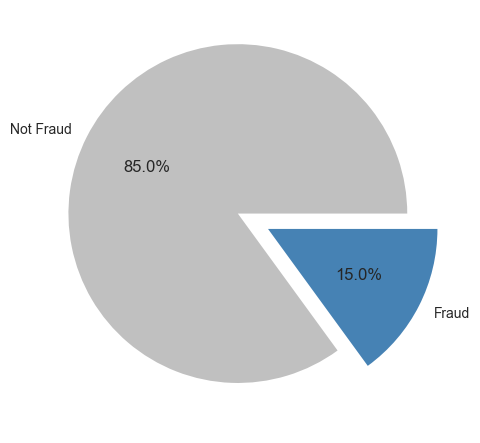

In [7]:
labels = ['Not Fraud','Fraud']
explode = (0.1,0.1)
colors = ['silver', 'steelblue']

plt.pie(df["FLAG"].value_counts(), labels=labels, autopct='%1.1f%%', colors=colors, explode=explode)
plt.show()

Interesting library that i have found (pycaret). Let's evaluate the best model while split the dataset
to train and test set automatically.

In [8]:
setup(df,target="FLAG",session_id=123)

,Description,Value
0,Session id,123
1,Target,FLAG
2,Target type,Binary
3,Original data shape,"(9012, 46)"
4,Transformed data shape,"(9012, 46)"
5,Transformed train set shape,"(6308, 46)"
6,Transformed test set shape,"(2704, 46)"
7,Numeric features,45
8,Preprocess,True
9,Imputation type,simple


In [9]:
best = compare_models()
best

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9851,0.9973,0.9291,0.9705,0.9492,0.9405,0.9409,0.2390
rf,Random Forest Classifier,0.9807,0.9964,0.8900,0.9795,0.9324,0.9212,0.9227,0.2850
gbc,Gradient Boosting Classifier,0.9792,0.9955,0.8932,0.9659,0.9279,0.9158,0.9169,0.6330
ada,Ada Boost Classifier,0.9775,0.9944,0.9165,0.9326,0.9244,0.9112,0.9113,0.2620
et,Extra Trees Classifier,0.9773,0.9954,0.8815,0.9651,0.9210,0.9078,0.9094,0.3090
dt,Decision Tree Classifier,0.9635,0.9285,0.8784,0.8788,0.8784,0.8569,0.8571,0.1200
knn,K Neighbors Classifier,0.9055,0.8826,0.6054,0.7212,0.6564,0.6023,0.6064,0.1250
lr,Logistic Regression,0.8564,0.6882,0.0539,0.4069,0.0918,0.0782,0.1223,0.5430
lda,Linear Discriminant Analysis,0.8508,0.8131,0.0127,0.6417,0.0248,0.0188,0.0722,0.1720
ridge,Ridge Classifier,0.8505,0.0000,0.0064,0.5500,0.0126,0.0095,0.0490,0.1130


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

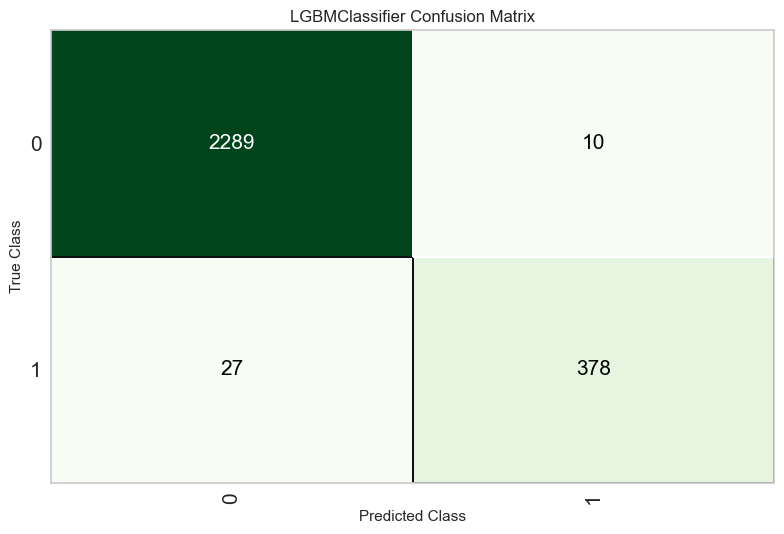

In [10]:
plot_model(best, plot = 'confusion_matrix')

In [11]:
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9863,0.9985,0.9333,0.9742,0.9533,0.9453,0.9456


,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,...,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,FLAG,prediction_label,prediction_score
641,2256.870117,144.309998,13304.629883,5,14,0,14,4,0.132979,1.147924,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.9989
6765,3.060000,0.520000,10.200000,3,2,0,2,3,635.074036,1365.926025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0000
2867,4.940000,7251.890137,348317.875000,46,48,0,2,1,0.043500,3.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0000
5153,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.9999
3752,1.630000,0.000000,4.900000,3,2,0,2,3,101.373589,1899.626465,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178,1.970000,0.000000,5.900000,3,2,0,2,3,443.328552,1557.671509,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0000
8698,0.000000,2223.580078,200121.921875,0,90,1,3,0,0.000000,0.629101,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,1.0000
5248,0.000000,105.419998,210.850006,0,2,0,2,0,1.750000,4.627059,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.9972
3939,106.419998,4949.040039,555781.500000,107,110,0,2,1,0.017155,2.072567,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0000


In [12]:
# Anomaly detection
s = AnomalyExperiment()
s.setup(df, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(9012, 46)"
2,Transformed data shape,"(9012, 46)"
3,Numeric features,46
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [13]:
s.models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [14]:
knn = create_model('knn')
print(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9128,0.8702,0.6277,0.7468,0.6821,0.6320,0.6352
1,0.9097,0.9078,0.6489,0.7176,0.6816,0.6291,0.6302
2,0.9081,0.8964,0.6277,0.7195,0.6705,0.6173,0.6193
3,0.9223,0.9091,0.7053,0.7614,0.7322,0.6869,0.6876
4,0.9065,0.9001,0.5263,0.7812,0.6289,0.5778,0.5925
5,0.8970,0.8471,0.5263,0.7143,0.6061,0.5484,0.5568
6,0.9049,0.8802,0.6316,0.7059,0.6667,0.6114,0.6127
7,0.8970,0.8610,0.5789,0.6875,0.6286,0.5693,0.5721
8,0.9016,0.8648,0.5532,0.7222,0.6265,0.5710,0.5777


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [15]:
from pycaret.clustering import *
ss = setup(df, normalize = True)

,Description,Value
0,Session id,8250
1,Original data shape,"(9012, 46)"
2,Transformed data shape,"(9012, 46)"
3,Numeric features,46
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


In [16]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.8545,1051.5460,1.0959,0,0,0


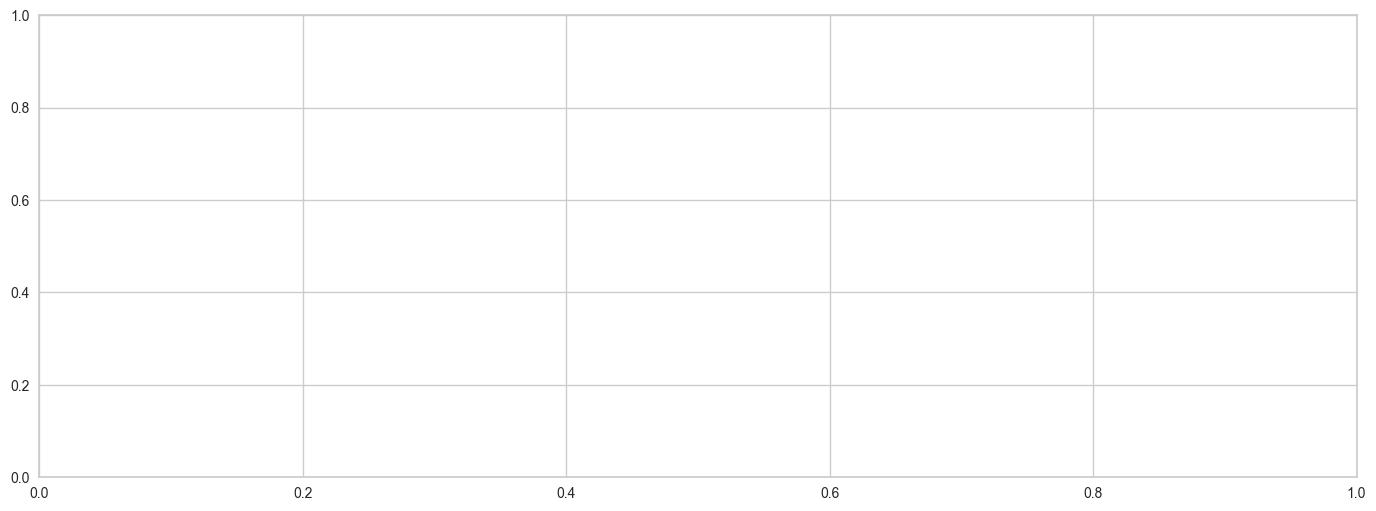

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [17]:
evaluate_model(kmeans)